In [ ]:
1．用于分类
（1）利用KNN模型对sklearn中的乳腺癌数据集进行乳腺癌诊断

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
data = np.array(load_breast_cancer()['data'][10:])
lable = np.array(load_breast_cancer()['target'][10:])
data_test = np.array(load_breast_cancer()['data'][0:10])
lable_test = np.array(load_breast_cancer()['target'][0:10])
model = KNeighborsClassifier(n_neighbors=4)
model.fit(data,lable)
res = model.predict(data_test)
print('prediction',res)
print('real lable',lable_test)
acc = model.score(data_test,lable_test)
print("accuracy",acc)

prediction [0 0 0 1 0 0 0 0 0 0]
real lable [0 0 0 0 0 0 0 0 0 0]
accuracy 0.9


In [ ]:
（2）利用KNN模型对sklearn中的鸢尾花数据集进行分类并画出分类图

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
iris=load_iris()
data=iris['data']
target=iris['target']
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2)
knn=KNeighborsClassifier()
knn.fit(X_train,y_train).score(X_train,y_train)
knn.score(X_test,y_test)

0.9333333333333333

In [11]:
# 画分类边界，从四个特征中选出两个特征
from pandas import DataFrame
df=DataFrame(data=data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


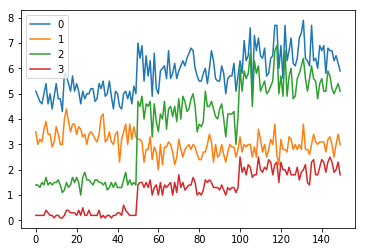

In [5]:
df.plot()  # 折线图如图10-2所示

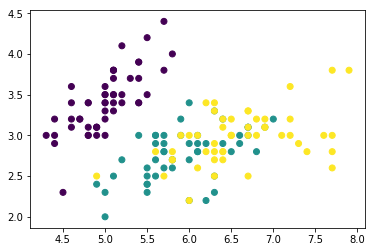

In [12]:
# 选前两个特征画散点图
data=data[:,0:2]
data.shape
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1],c=target)  # 散点图如图10-3所示

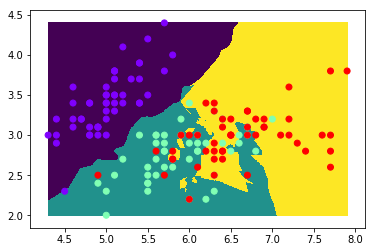

In [13]:
x,y=np.linspace(data[:,0].min(),data[:,0].max(),1000),np.linspace(data[:,1].min(),data[:,1].max(),1000)
X,Y=np.meshgrid(x,y)
XY=np.c_[X.ravel(),Y.ravel()]
knn=KNeighborsClassifier()
knn.fit(data,target)
y_=knn.predict(XY)  # 训练1百万个点
plt.pcolormesh(X,Y,y_.reshape(1000,1000))  # 画大块颜色图如图10-4所示
plt.scatter(data[:,0],data[:,1],c=target,cmap='rainbow')

In [ ]:
2．用于回归

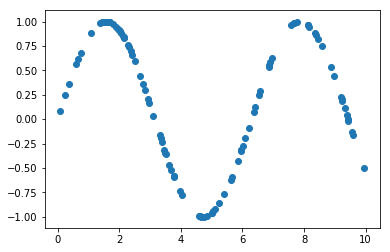

In [17]:
x=np.random.rand(100)*10    # “0~1”均匀分布的随机样本值，不包括1
y=np.sin(x)
plt.scatter(x,y)  # 正弦散点图如图10-5所示

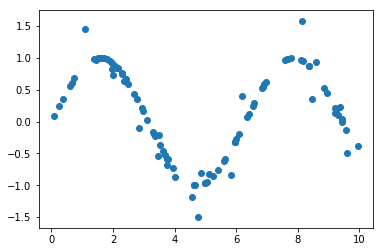

In [18]:
y[::4]+=np.random.randn(25)*0.3  # 每隔4个点加一个噪点，如图10-6所示 
plt.scatter(x,y)

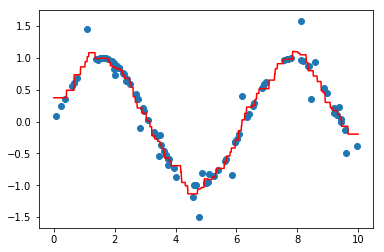

In [19]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x.reshape(-1,1),y)  #  y是标记
X_test=np.linspace(0,10,1000).reshape(-1,1)  # 生成预测数据0到10，预测不了10-20的数据
y_=knn.predict(X_test)
plt.scatter(x,y)
plt.plot(X_test,y_,c='r')  # 红色线是我们预测出来的走势，如图10-7所示